In [1]:
import pandas as pd

In [137]:
df = pd.read_csv('student_engagement_data_10000.csv')

df.head()

,Student ID,Session ID,Date,EEG Data (PSD Features),Engagement Level,Attention Level,Internet Connectivity,Adaptivity Level,Learning Mode Prediction,Performance Metrics
0,1,183,2025-01-20,"[0.02336871035675725, 0.14892576656473, 0.4845...",High,High,High (Mobile/Wi-Fi),Moderate,Visual Learner,84
1,2,121,2025-01-20,"[0.3587673311624021, 0.8537981137219391, 0.420...",Low,High,Moderate (Wi-Fi),High,Auditory Learner,82
2,3,169,2025-01-10,"[0.7420744093003028, 0.9072353407615483, 0.122...",Moderate,High,Low (Mobile),Low,Auditory Learner,83
3,4,132,2025-01-20,"[0.5596059164442914, 0.4645215049524961, 0.062...",High,Moderate,Low (Mobile),Moderate,Visual Learner,66
4,5,190,2025-01-18,"[0.15041646487754368, 0.7331633184349893, 0.86...",High,High,High (Mobile/Wi-Fi),Moderate,Auditory Learner,93


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Student ID                10000 non-null  int64 
 1   Session ID                10000 non-null  int64 
 2   Date                      10000 non-null  object
 3   EEG Data (PSD Features)   10000 non-null  object
 4   Engagement Level          10000 non-null  object
 5   Attention Level           10000 non-null  object
 6   Internet Connectivity     10000 non-null  object
 7   Adaptivity Level          10000 non-null  object
 8   Learning Mode Prediction  10000 non-null  object
 9   Performance Metrics       10000 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 781.4+ KB


In [7]:
df.describe()

,Student ID,Session ID,Performance Metrics
count,10000.00000,10000.000000,10000.000000
mean,5000.50000,149.762700,74.674300
std,2886.89568,28.783232,14.383404
min,1.00000,100.000000,50.000000
25%,2500.75000,125.000000,62.000000
50%,5000.50000,150.000000,75.000000
75%,7500.25000,174.000000,87.000000
max,10000.00000,199.000000,99.000000


In [11]:
df.isnull().sum()

Student ID                  0
Session ID                  0
Date                        0
EEG Data (PSD Features)     0
Engagement Level            0
Attention Level             0
Internet Connectivity       0
Adaptivity Level            0
Learning Mode Prediction    0
Performance Metrics         0
dtype: int64

In [23]:
categorical_cols = ['Student ID','Session ID','Engagement Level','Attention Level','Internet Connectivity','Adaptivity Level','Learning Mode Prediction']

for cols in categorical_cols:
    print(df[cols].value_counts())

Student ID
9984    1
9983    1
9982    1
9981    1
9980    1
       ..
5       1
4       1
3       1
2       1
1       1
Name: count, Length: 10000, dtype: int64
Session ID
164    133
162    127
140    125
138    120
110    119
      ... 
158     85
116     85
125     84
133     83
181     82
Name: count, Length: 100, dtype: int64
Engagement Level
Low         3366
Moderate    3357
High        3277
Name: count, dtype: int64
Attention Level
Moderate    3385
High        3317
Low         3298
Name: count, dtype: int64
Internet Connectivity
Moderate (Wi-Fi)       3389
High (Mobile/Wi-Fi)    3321
Low (Mobile)           3290
Name: count, dtype: int64
Adaptivity Level
Moderate    3360
Low         3331
High        3309
Name: count, dtype: int64
Learning Mode Prediction
Kinesthetic Learner    3374
Auditory Learner       3326
Visual Learner         3300
Name: count, dtype: int64


In [24]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [131]:
df['Engagement Level'].unique()

array(['High', 'Low', 'Moderate'], dtype=object)

In [132]:
df['Attention Level'].unique()

array(['High', 'Moderate', 'Low'], dtype=object)

In [140]:
level_mapping = {'Low': 1, 'Moderate': 2, 'High': 3}

df['Attention Numeric'] = df['Attention Level'].map(level_mapping)
df['Engagement Numeric'] = df['Engagement Level'].map(level_mapping)



In [64]:
daily_eng_att = df.groupby('Date')[['Engagement Numeric','Attention Numeric']].mean()

daily_eng_att.head()

,Engagement Numeric,Attention Numeric
Date,,
2025-01-01,2.046053,2.013158
2025-01-02,1.978916,2.024096
2025-01-03,2.003165,1.984177
2025-01-04,1.962162,2.078378
2025-01-05,2.006116,1.932722


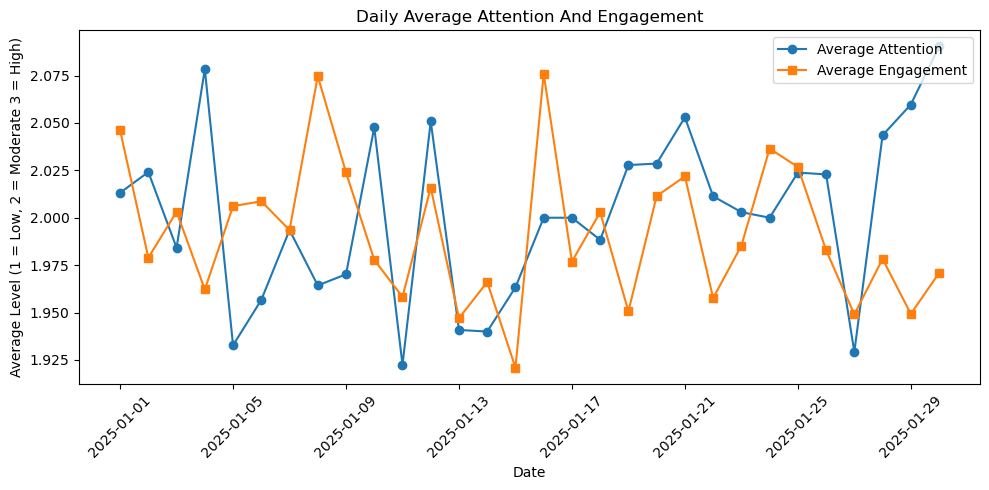

In [92]:
plt.figure(figsize=(10, 5))

plt.plot(daily_eng_att.index, daily_eng_att['Attention Numeric'], label='Average Attention', marker='o')
plt.plot(daily_eng_att.index, daily_eng_att['Engagement Numeric'], label='Average Engagement', marker='s')


plt.xlabel('Date')
plt.ylabel('Average Level (1 = Low, 2 = Moderate 3 = High)')
plt.title('Daily Average Attention And Engagement')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [143]:
student_lvl = df.groupby('Student ID')[['Engagement Numeric']].mean()

top_students = student_lvl.sort_values('Engagement Numeric', ascending=False).head(10)

bottom_students = student_lvl.sort_values('Engagement Numeric').head(10)



<Figure size 1000x500 with 0 Axes>

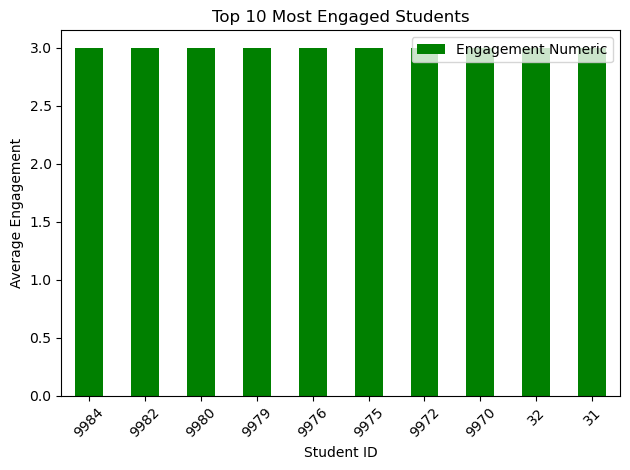

In [121]:
plt.figure(figsize=(10, 5))
top_students.plot(kind='bar', color='green')
plt.title('Top 10 Most Engaged Students')
plt.ylabel('Average Engagement')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1000x500 with 0 Axes>

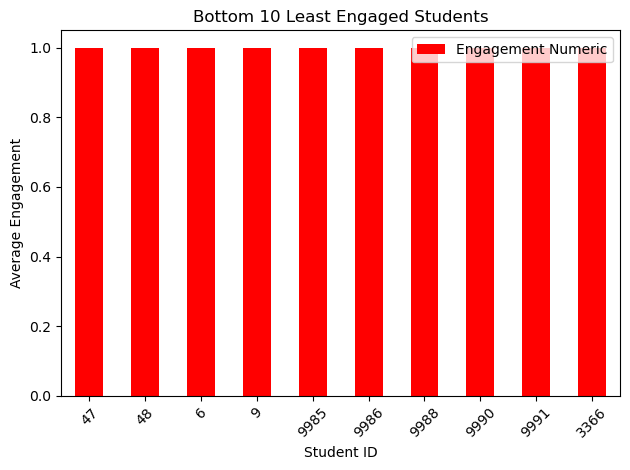

In [124]:
plt.figure(figsize=(10, 5))
bottom_students.plot(kind='bar', color='red')
plt.title('Bottom 10 Least Engaged Students')
plt.ylabel('Average Engagement')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

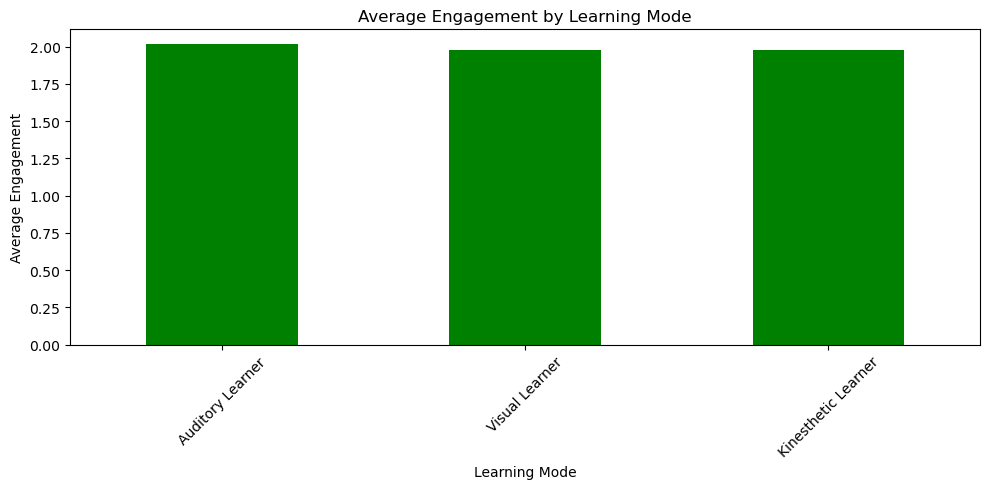

In [129]:
mode_engagement = df.groupby('Learning Mode Prediction')['Engagement Numeric'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
mode_engagement.plot(kind='bar', color='green')
plt.title('Average Engagement by Learning Mode')
plt.ylabel('Average Engagement')
plt.xlabel('Learning Mode')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()